## #60.単語ベクトルの読み込みと表示

In [1]:
#gensimというパッケージを用いてコーディングしていく

from gensim.models import KeyedVectors

vec_bin_file = "./data/GoogleNews-vectors-negative300.bin.gz"

model = KeyedVectors.load_word2vec_format(vec_bin_file, binary=True)

print(model.vectors.shape)
print(model["United_States"])

(3000000, 300)
[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.714843

## #61.単語の類似度

In [2]:
print(model.similarity("United_States", "U.S."))

0.73107743


## #62.類似度の高い単語10件

In [3]:
print(model.most_similar("United_States"))

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370987892151), ('United_Sates', 0.7400725483894348), ('U.S.', 0.7310774922370911), ('theUnited_States', 0.6404394507408142), ('America', 0.6178409457206726), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.6019068956375122)]


## #63.加法構成性によるアナロジー

In [4]:
print(model.most_similar(positive=["Spain", "Athens"], negative=["Madrid"]))

[('Greece', 0.6898480653762817), ('Aristeidis_Grigoriadis', 0.5606847405433655), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862693786621), ('Hrysopiyi_Devetzi', 0.5248445272445679), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166866183280945), ('Iraklion', 0.5146791338920593)]


## #64.アナロジーデータでの実験

In [5]:
counter = 0
with open("./data/questions-words.txt", "r") as f:
    for line in f:
        assert counter != 10
        line = line.split()
        if len(line) != 4:continue
        print(line)
        ResultWord = model.most_similar(positive=[line[0], line[2]], negative=[line[1]])[0]
        line.append(ResultWord)
        print(line)
        counter += 1

['Athens', 'Greece', 'Baghdad', 'Iraq']
['Athens', 'Greece', 'Baghdad', 'Iraq', ('Mosul', 0.6269411444664001)]
['Athens', 'Greece', 'Bangkok', 'Thailand']
['Athens', 'Greece', 'Bangkok', 'Thailand', ('Bangkok_Thailand', 0.588470458984375)]
['Athens', 'Greece', 'Beijing', 'China']
['Athens', 'Greece', 'Beijing', 'China', ('Bejing', 0.6612639427185059)]
['Athens', 'Greece', 'Berlin', 'Germany']
['Athens', 'Greece', 'Berlin', 'Germany', ('Munich', 0.5469033122062683)]
['Athens', 'Greece', 'Bern', 'Switzerland']
['Athens', 'Greece', 'Bern', 'Switzerland', ('Greenville', 0.5402410626411438)]
['Athens', 'Greece', 'Cairo', 'Egypt']
['Athens', 'Greece', 'Cairo', 'Egypt', ('Tunis', 0.5361572504043579)]
['Athens', 'Greece', 'Canberra', 'Australia']
['Athens', 'Greece', 'Canberra', 'Australia', ('Sydney', 0.6912948489189148)]
['Athens', 'Greece', 'Hanoi', 'Vietnam']
['Athens', 'Greece', 'Hanoi', 'Vietnam', ('Ha_Noi', 0.6273833513259888)]
['Athens', 'Greece', 'Havana', 'Cuba']
['Athens', 'Greece',

AssertionError: 

In [15]:
%%time
with open('./data/questions-words.txt', 'r') as fi, open('./data/questions-words_pred.txt', 'w') as fo:
    for idx, line in enumerate(fi, start=1):
        line = line.strip()

        # データ説明の行はそのままファイル出力する
        if line.startswith(': '):
            print('line{idx}> {line}'.format(idx=idx, line=line.strip()))   #一応確認したいから出力する
            line = line + '\n'
        else:
            words = line.split()
            pred, sim = model.most_similar(positive=[words[1], words[2]], negative=[words[0]], topn=1)[0]
            line = line + ' ' + pred + ' ' + str(sim) + '\n'
        fo.write(line)

line1> : capital-common-countries
line508> : capital-world
line5033> : currency
line5900> : city-in-state
line8368> : family
line8875> : gram1-adjective-to-adverb
line9868> : gram2-opposite
line10681> : gram3-comparative
line12014> : gram4-superlative
line13137> : gram5-present-participle
line14194> : gram6-nationality-adjective
line15794> : gram7-past-tense
line17355> : gram8-plural
line18688> : gram9-plural-verbs
CPU times: user 3h 55min 43s, sys: 16min 18s, total: 4h 12min 2s
Wall time: 33min 1s


## #65.アナロジータスクでの正解率

In [6]:
from itertools import islice
from itertools import tee
from sklearn.metrics import accuracy_score

def calc_accuracy(data):
    answers = []
    preds = []
    
    for line in data:
        line = line.strip()
        if not line.startswith(": "):
            _, _, _, answer, pred, _ = line.split()
            answers.append(answer)
            preds.append(pred)

    assert len(answers) == len(preds)  # デバッグ用行
    acc = accuracy_score(answers, preds)

    return acc

semantic_tasks_num = 8874
syntactic_tasks_num = 10684  # 全行19558 - semanticの行8874 = 10684

with open("./data/questions-words_pred.txt", "r") as fi:
    # イテレータとは、リストなどの複数の要素を持ったデータ型に対して、順番にデータを取り出す機能を提供するもの
    semantic_tasks = islice(fi, semantic_tasks_num)
    syntactic_tasks = islice(fi, syntactic_tasks_num)

    print("semantic analogy: ", calc_accuracy(semantic_tasks))
    print("syntactic analogy: ", calc_accuracy(syntactic_tasks))



semantic analogy:  0.7308602999210734
syntactic analogy:  0.7400468384074942


In [7]:
# isliceの挙動についてのテスト
with open("./data/Test.txt", "r") as f:
    A = islice(f, 2)
    B = islice(f, 4)
    
    for i in A:
        print(i.strip())
        
    print()
    
    for i in B:
        print(i.strip())

AAA
BBB

CCC
DDD
EEE
FFF


## #66.WordSimilarlity-353での評価

In [87]:
#zipファイルのダウンロード(実行は一度でよい)
!wget -nc https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip -P ./data

--2022-04-28 14:19:07--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
gabrilovich.com (gabrilovich.com) をDNSに問いあわせています... 208.97.177.37
gabrilovich.com (gabrilovich.com)|208.97.177.37|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 23257 (23K) [application/zip]
`./data/wordsim353.zip' に保存中

wordsim353.zip      100%[===================>]  22.71K   128KB/s 時間 0.2s       

2022-04-28 14:19:08 (128 KB/s) - `./data/wordsim353.zip' へ保存完了 [23257/23257]



In [88]:
#zipファイルの解凍(実行は一度でよい)
!unzip ./data/wordsim353.zip -d ./data/wordsim353/

Archive:  ./data/wordsim353.zip
  inflating: ./data/wordsim353/combined.csv  
  inflating: ./data/wordsim353/set1.csv  
  inflating: ./data/wordsim353/set2.csv  
  inflating: ./data/wordsim353/combined.tab  
  inflating: ./data/wordsim353/set1.tab  
  inflating: ./data/wordsim353/set2.tab  
  inflating: ./data/wordsim353/instructions.txt  


In [1]:
!ls ./*

./RyoheiKamei_ch07.ipynb

./data:
GoogleNews-vectors-negative300.bin.gz questions-words_pred.txt
Test.txt                              wordsim353
questions-words.txt                   wordsim353.zip

./src:

./work:


In [8]:
from scipy.stats import spearmanr

gold_scores = []
pred_scores = []

with open("./data/wordsim353/combined.tab", "r") as fi:
    for i, line in enumerate(fi):
        line = line.strip()
        if i == 0:
            pass
        else:
            w1, w2, score = line.strip().split("\t")
            gold_scores.append(float(score))
            pred_scores.append(model.similarity(w1, w2))

correlation, pvalue = spearmanr(gold_scores, pred_scores)
print(correlation, "(pvalue={p})".format(p = pvalue))

0.7000166486272194 (pvalue=2.86866666051422e-53)


## #67.k-meansクラスタリング

In [9]:
#国名に関する単語ベクトルの抽出

target_categories = {"capital-common-countries", "capital-world"}
countries = set()

with open("./data/questions-words.txt", "r") as fi, open("./data/questions-words_countries.txt", "w") as fo:
    for line in fi:
        line = line.strip()
        if line.startswith(": "):
            category = line.strip(": ")
        elif category in target_categories:
            countries.update(line.split())
    countries = list(countries)
    fo.write("\n".join(countries))
    print("Number of Country Words: {}".format(len(countries)))
    print(countries)

Number of Country Words: 232
['Iran', 'Ghana', 'Malawi', 'Bahrain', 'Greenland', 'Angola', 'Afghanistan', 'Ireland', 'Bujumbura', 'Manila', 'Latvia', 'Burundi', 'Uzbekistan', 'Germany', 'Thailand', 'Moldova', 'Nicosia', 'Muscat', 'Ottawa', 'Senegal', 'Jordan', 'Sudan', 'Macedonia', 'Eritrea', 'Paramaribo', 'Italy', 'Kigali', 'Dominica', 'Zambia', 'Madagascar', 'Abuja', 'Samoa', 'Honduras', 'Dakar', 'Maputo', 'Oslo', 'Athens', 'Peru', 'Santiago', 'Chisinau', 'Spain', 'Minsk', 'Niamey', 'Kabul', 'London', 'Harare', 'Poland', 'Vietnam', 'Turkey', 'Nigeria', 'Somalia', 'Rabat', 'Yerevan', 'Bahamas', 'Rwanda', 'Sofia', 'Lilongwe', 'Kampala', 'Havana', 'Liechtenstein', 'Austria', 'Thimphu', 'Algiers', 'Amman', 'Guinea', 'Podgorica', 'Tunis', 'Doha', 'Laos', 'Warsaw', 'Astana', 'Lisbon', 'Zimbabwe', 'Belarus', 'Tripoli', 'England', 'Luanda', 'Montenegro', 'Mali', 'Bangkok', 'Ankara', 'Taiwan', 'Vientiane', 'Paris', 'Jakarta', 'Qatar', 'Libya', 'Bhutan', 'Tehran', 'Dushanbe', 'Funafuti', 'Dama

In [10]:
#K-meanクラスタリングの実行

from sklearn.cluster import KMeans
import numpy as np

countries_vec = [model[country] for country in countries]
# print(countries_vec)


# from collections import defaultdict

# countries_vec = model.query(countries)
# pred_cluster_idxs = KMeans(n_clusters=5, random_state=0).fit_predict(countries_vec)

# clusteridx2words = defaultdict(list)
# for idx, country in zip(pred_cluster_idxs, countries):
#     clusteridx2words[idx].append(country)
    
# for idx in range(0, len(clusteridx2words)):
#     words = clusteridx2words[idx]
#     print("Cluster {idx} ({len}): \n{countries}\n".format(idx = idx), len = len(words), countries = ", ".join(words))

kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)

for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print("cluster", i)
    print(", ".join([countries[k] for k in cluster]))

cluster 0
Bujumbura, Kigali, Abuja, Dakar, Maputo, Niamey, Harare, Lilongwe, Kampala, Luanda, Monrovia, Windhoek, Conakry, Lusaka, Khartoum, Nouakchott, Antananarivo, Libreville, Nairobi, Bamako, Gaborone, Accra, Banjul, Asmara, Mogadishu
cluster 1
Ghana, Malawi, Angola, Burundi, Thailand, Senegal, Sudan, Eritrea, Dominica, Zambia, Madagascar, Samoa, Honduras, Peru, Vietnam, Nigeria, Somalia, Bahamas, Rwanda, Guinea, Laos, Zimbabwe, Mali, Taiwan, Bhutan, Pakistan, Cuba, Niger, Venezuela, Nicaragua, Chile, Tuvalu, Mozambique, Namibia, Philippines, Liberia, Indonesia, Mauritania, Nepal, Ecuador, Belize, Jamaica, Gambia, Fiji, Gabon, Bangladesh, Kenya, Suriname, Botswana, Guyana, Uganda
cluster 2
Uzbekistan, Moldova, Chisinau, Minsk, Yerevan, Sofia, Podgorica, Warsaw, Astana, Belarus, Ankara, Dushanbe, Bishkek, Baku, Budapest, Azerbaijan, Kiev, Riga, Armenia, Bratislava, Ashgabat, Tashkent, Kyrgyzstan, Vilnius, Zagreb, Turkmenistan, Tajikistan, Helsinki, Ukraine, Bucharest, Tbilisi, Mosco

## #68.Ward法によるクラスタリング

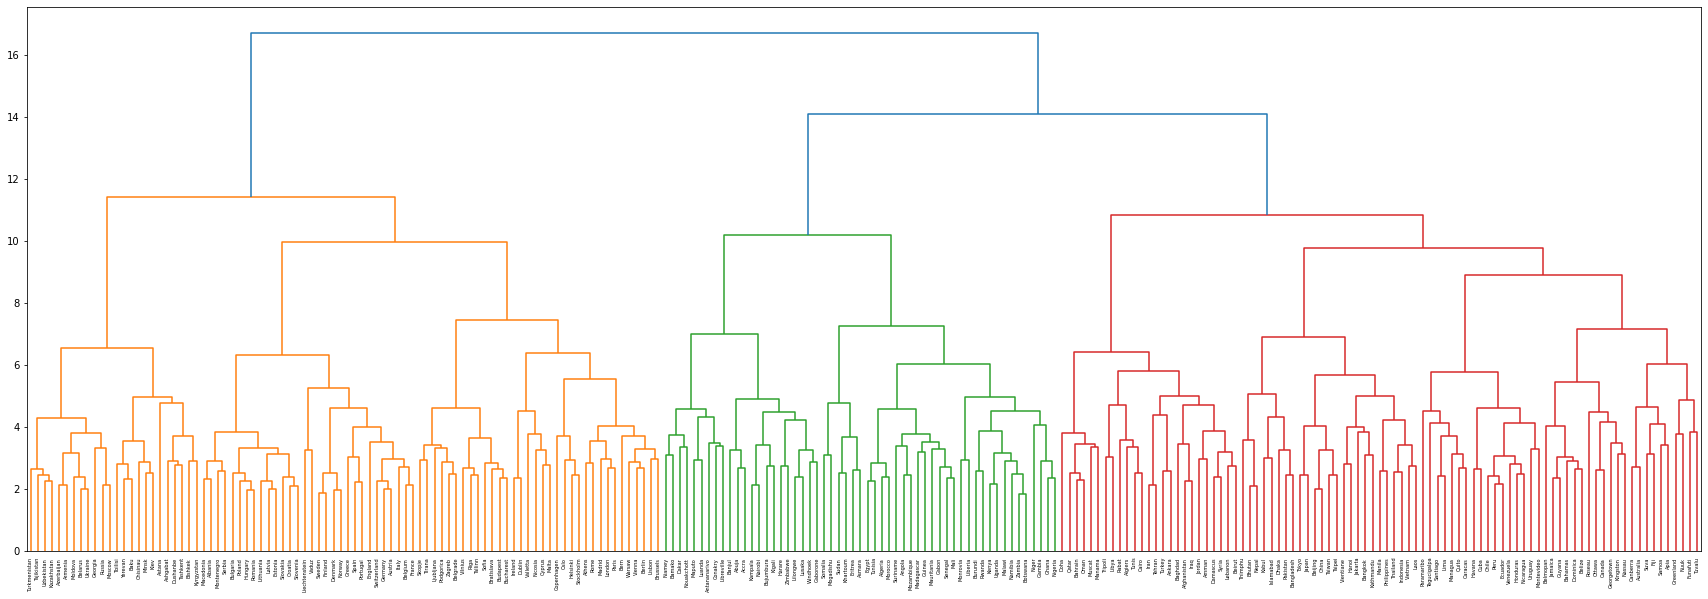

In [11]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(30, 10))
Z = linkage(countries_vec, method="ward")
dendrogram(Z, labels=countries)
plt.show()

## #59.t-SNEによる可視化

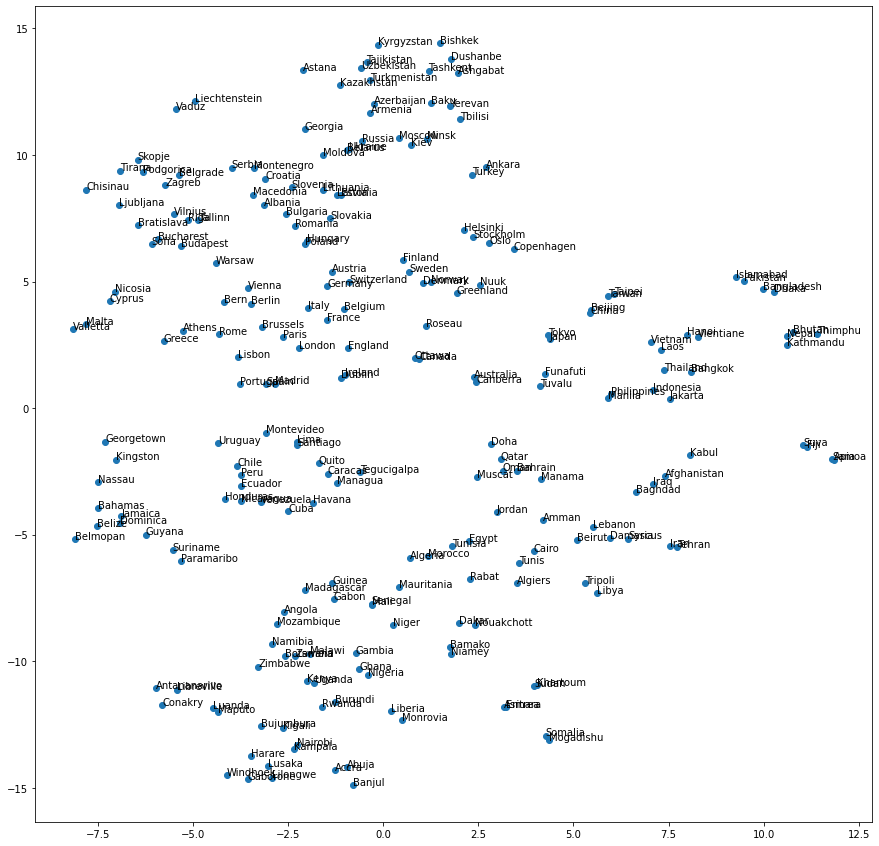

In [13]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(15,15))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()